In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
!python3 -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

## Load books

In [4]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('2019') if '.txt' in b.name]

In [5]:
all_books

[<DirEntry '2019.txt'>]

In [6]:
book = all_books[0]
# book = cryptojacking
book_text = open(book).read()
print(book_text)

Weeding out WannaMine v4.0: Analyzing and Remediating This Mineware Nightmare

Although the world of mineware is not new to the security industry, it continues to grow as adversaries develop new capabilities to compromise systems and turn them into bots used for mining cryptocurrency. In this blog, we hope to provide some deeper insight into the world of mineware. We will discuss in-depth one of the most notorious mineware malware variants out there, “WannaMine.”  Our deep dive will analyze the latest WannaMine variant currently being used in the wild, dubbed “WannaMine v4.0,” and outline how you can successfully identify and remediate a WannaMine v4.0 infected host. Cryptojacking and WannaMine In essence, cryptojacking is the unauthorized use of a computing device to mine cryptocurrency. It occurs when adversaries compromise an organization’s systems and use their resources to mine cryptocurrency, freeing them from having to purchase hardware and electricity (more detailed information

In [7]:
all_entities = NER(book_text)

In [8]:
entity_types_to_remove = ["CARDINAL", "TIME", "DATE", "ORDINAL", "QUANTITY", "PERCENT", "MONEY"]
filtered_entities =[ent.text for ent in all_entities.ents if ent.label_ not in entity_types_to_remove]
print(filtered_entities)

['WannaMine', 'WannaMine', 'WannaMine', 'WannaMine', 'WannaMine', 'WannaMine', 'WannaMine', 'WannaMine', 'Monero', 'Monero', 'WannaMine', 'WannaCry', 'WannaMine', 'WannaCry', 'EternalBlue', 'Monero', 'WannaMine v4.0 Analysis and Remediation Overview \n\nLike', 'WannaMine', 'EternalBlue', 'WannaMine', 'EternalBlue', 'NetworkDistribution', 'WannaMine v3.0', 'WannaMine', 'Locating', 'NetworkDistribution', 'WannaMine', 'CrowdStrike Falcon®', 'Falcon', 'PREVENTIONS', 'Falcon', 'WannaMine', 'XMRig', 'Falcon', 'Falcon', 'WannaMine', 'DLL', 'the Falcon UI', 'the “EDIT & RUN SCRIPTS', 'SVCHOST', 'Microsoft', 'SVCHOST', 'Windows 10', 'SVCHOST', 'Windows 7', 'PID', 'Review Appendix', 'SVCHOST', 'WannaMine', 'DLL', 'the “EDIT & RUN SCRIPTS', 'SVCHOST', 'DLL', 'Windows', 'Parameters', 'DLL', 'RTR', 'DLL', 'VirusTotal', 'Windows', 'DLL', 'DLL', 'Reviewing the compiler', 'SVCHOST', 'the “EDIT & RUN SCRIPTS', 'ServiceDLL', 'SVCHOST', 'WannaMine', 'the “EDIT & RUN SCRIPTS', 'WannaMine', 'WannaMine', 't

In [9]:
# Visualize identified entities
displacy.render(all_entities[0:2000], style="ent", jupyter=True)

## Get named entity list per sentence

In [10]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in all_entities.sents:
    entity_list = [ent.text for ent in sent.ents if ent.label_ not in entity_types_to_remove]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)
print(sent_entity_df.head(10))

                                            sentence  \
0  (Weeding, out, WannaMine, v4.0, :, Analyzing, ...   
1  (Although, the, world, of, mineware, is, not, ...   
2  (In, this, blog, ,, we, hope, to, provide, som...   
3  (We, will, discuss, in, -, depth, one, of, the...   
4  (Our, deep, dive, will, analyze, the, latest, ...   
5  (Cryptojacking, and, WannaMine, In, essence, ,...   
6  (It, occurs, when, adversaries, compromise, an...   
7  (Many, times, ,, this, malicious, mining, occu...   
8  (As, adversaries, and, cybercriminals, searche...   
9  (WannaMine, is, a, mineware, malware, variant,...   

                            entities  
0                        [WannaMine]  
1                                 []  
2                                 []  
3                        [WannaMine]  
4  [WannaMine, WannaMine, WannaMine]  
5                        [WannaMine]  
6                                 []  
7                                 []  
8                        [WannaM

In [11]:
sent_entity_df

,sentence,entities
0,"(Weeding, out, WannaMine, v4.0, :, Analyzing, ...",[WannaMine]
1,"(Although, the, world, of, mineware, is, not, ...",[]
2,"(In, this, blog, ,, we, hope, to, provide, som...",[]
3,"(We, will, discuss, in, -, depth, one, of, the...",[WannaMine]
4,"(Our, deep, dive, will, analyze, the, latest, ...","[WannaMine, WannaMine, WannaMine]"
...,...,...
340,"(The, Bullish, group, is, majority, -, owned, ...",[Block.one]
341,"(CoinDesk, operates, as, an, independent, subs...",[]
342,"(CoinDesk, employees, ,, including, journalist...",[]
343,"(Learn, more, about, Consensus, 2024, ,, CoinD...","[Learn, CoinDesk]"


In [12]:
# Filter out sentences that don't have any entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities
0,"(Weeding, out, WannaMine, v4.0, :, Analyzing, ...",[WannaMine]
3,"(We, will, discuss, in, -, depth, one, of, the...",[WannaMine]
4,"(Our, deep, dive, will, analyze, the, latest, ...","[WannaMine, WannaMine, WannaMine]"
5,"(Cryptojacking, and, WannaMine, In, essence, ,...",[WannaMine]
8,"(As, adversaries, and, cybercriminals, searche...",[WannaMine]
9,"(WannaMine, is, a, mineware, malware, variant,...","[WannaMine, Monero, Monero]"
10,"(WannaMine, plays, on, the, naming, convention...","[WannaMine, WannaCry]"
11,"(This, is, likely, because, WannaMine, leverag...","[WannaMine, WannaCry, EternalBlue, Monero]"
12,"(WannaMine, v4.0, Analysis, and, Remediation, ...",[WannaMine v4.0 Analysis and Remediation Overv...
13,"(Its, design, is, similar, to, WannaMine, v3.0...","[WannaMine, EternalBlue, NetworkDistribution]"


In [13]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities
0,"(Weeding, out, WannaMine, v4.0, :, Analyzing, ...",[WannaMine]
3,"(We, will, discuss, in, -, depth, one, of, the...",[WannaMine]
4,"(Our, deep, dive, will, analyze, the, latest, ...","[WannaMine, WannaMine, WannaMine]"
5,"(Cryptojacking, and, WannaMine, In, essence, ,...",[WannaMine]
8,"(As, adversaries, and, cybercriminals, searche...",[WannaMine]
...,...,...
334,"(Salon, ,, a, news, outlet, ,, and, UNICEF, ,...",[UNICEF]
335,"(Hacker, image, via, Shutterstock, ., \n\n)",[Shutterstock]
339,"(In, November, 2023, ,, CoinDesk, was, acquire...","[CoinDesk, Bullish]"
340,"(The, Bullish, group, is, majority, -, owned, ...",[Block.one]


## Create relationships

In [14]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [15]:
relationship_df = pd.DataFrame(relationships)

In [16]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,WannaMine,Monero
1,WannaMine,Monero
2,Monero,WannaMine
3,WannaMine,WannaCry
4,WannaMine,Monero
5,Monero,WannaMine
6,WannaMine,WannaCry
7,WannaCry,WannaMine
8,WannaMine,WannaCry
9,WannaCry,EternalBlue


In [17]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Monero,WannaMine
1,Monero,WannaMine
2,Monero,WannaMine
3,WannaCry,WannaMine
4,Monero,WannaMine
5,Monero,WannaMine
6,WannaCry,WannaMine
7,WannaCry,WannaMine
8,WannaCry,WannaMine
9,EternalBlue,WannaCry


In [18]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [19]:
relationship_df.head(10)

,source,target,value
0,Monero,WannaMine,11
1,WannaCry,WannaMine,17
2,EternalBlue,WannaCry,12
3,EternalBlue,Monero,6
4,Monero,WannaMine v4.0 Analysis and Remediation Overvi...,5
5,WannaMine,WannaMine v4.0 Analysis and Remediation Overvi...,6
6,EternalBlue,WannaMine,17
7,EternalBlue,NetworkDistribution,6
8,NetworkDistribution,WannaMine v3.0,5
9,WannaMine,WannaMine v3.0,3


## Graph analysis and visualization

In [20]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

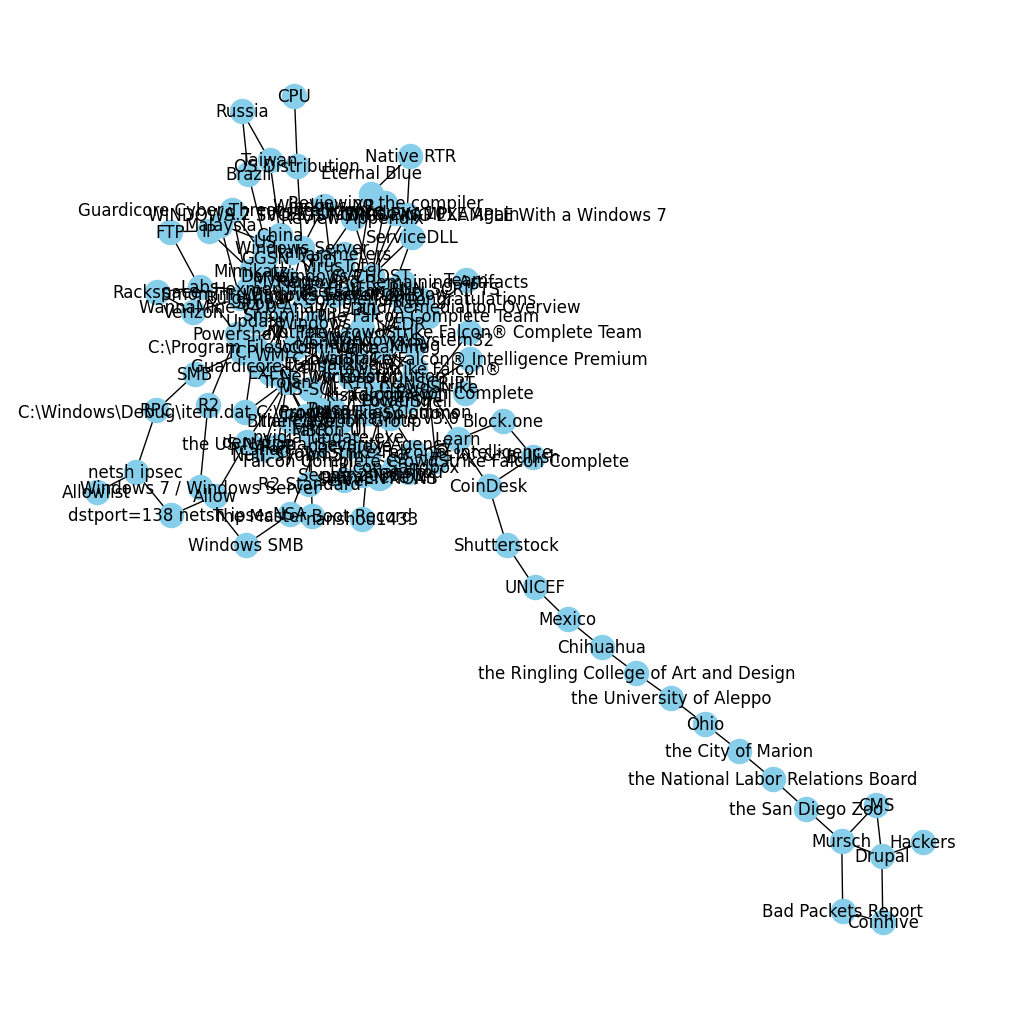

In [21]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [22]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html


### The most important characters in The Witcher

In [23]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Monero': 0.043795620437956206,
 'WannaMine': 0.15328467153284672,
 'WannaCry': 0.021897810218978103,
 'EternalBlue': 0.145985401459854,
 'WannaMine v4.0 Analysis and Remediation Overview \n\nLike': 0.014598540145985401,
 'NetworkDistribution': 0.051094890510948905,
 'WannaMine v3.0': 0.014598540145985401,
 'Locating': 0.014598540145985401,
 'CrowdStrike Falcon®': 0.014598540145985401,
 'Falcon': 0.072992700729927,
 'PREVENTIONS': 0.0072992700729927005,
 'XMRig': 0.029197080291970802,
 'DLL': 0.072992700729927,
 'the Falcon UI': 0.029197080291970802,
 'the “EDIT & RUN SCRIPTS': 0.051094890510948905,
 'SVCHOST': 0.08759124087591241,
 'Microsoft': 0.029197080291970802,
 'Windows 10': 0.0072992700729927005,
 'Windows 7': 0.0364963503649635,
 'PID': 0.029197080291970802,
 'Review Appendix': 0.014598540145985401,
 'Windows': 0.06569343065693431,
 'Parameters': 0.014598540145985401,
 'RTR': 0.029197080291970802,
 'VirusTotal': 0.014598540145985401,
 'Reviewing the compiler': 0.0072992700729

<Axes: >

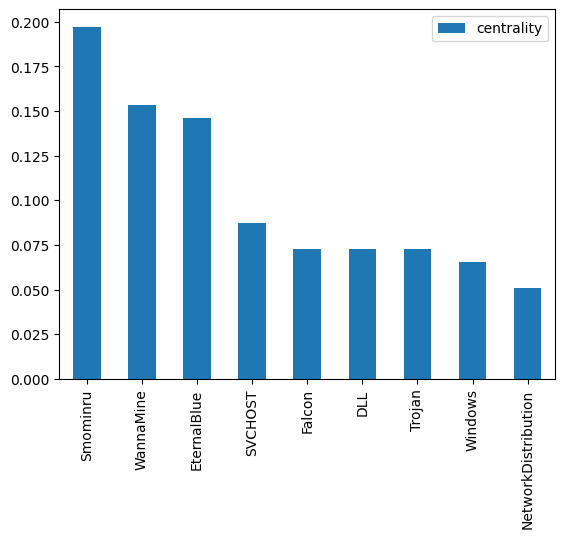

In [24]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

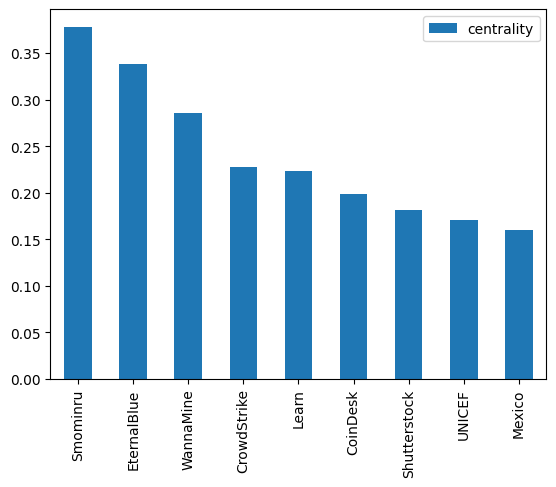

In [25]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

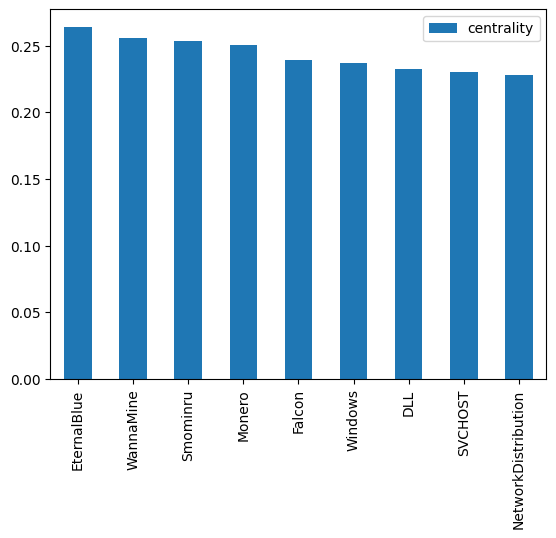

In [26]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [27]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [28]:
!pip install python-louvain

### Community detection

In [29]:
from community import community_louvain

In [30]:
communities = community_louvain.best_partition(G)

In [31]:
communities

{'Monero': 0,
 'WannaMine': 0,
 'WannaCry': 0,
 'EternalBlue': 0,
 'WannaMine v4.0 Analysis and Remediation Overview \n\nLike': 0,
 'NetworkDistribution': 0,
 'WannaMine v3.0': 0,
 'Locating': 0,
 'CrowdStrike Falcon®': 0,
 'Falcon': 0,
 'PREVENTIONS': 0,
 'XMRig': 0,
 'DLL': 1,
 'the Falcon UI': 2,
 'the “EDIT & RUN SCRIPTS': 2,
 'SVCHOST': 2,
 'Microsoft': 3,
 'Windows 10': 2,
 'Windows 7': 2,
 'PID': 2,
 'Review Appendix': 2,
 'Windows': 1,
 'Parameters': 1,
 'RTR': 0,
 'VirusTotal': 1,
 'Reviewing the compiler': 2,
 'ServiceDLL': 2,
 'Removing Remaining Artifacts': 2,
 'the Equation Group': 0,
 'Pulsar': 0,
 'C:\\Windows\\System32': 0,
 'Completion Congratulations': 2,
 'RTR RUNSCRIPT': 0,
 'PowerShell': 0,
 'EDR': 0,
 'NGAV': 0,
 'CrowdStrike Solutions': 4,
 'CrowdStrike': 4,
 'Falcon Sandbox': 4,
 'Falcon Complete CrowdStrike Falcon Complete': 4,
 'The CrowdStrike Falcon® Complete Team': 4,
 'Team': 4,
 'The Falcon Complete Team': 4,
 'Falcon Complete': 4,
 'CrowdStrike Falcon® I

In [32]:
nx.set_node_attributes(G, communities, 'group')

In [33]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_2019.html")

witcher_2019.html


### Evolution of characters' importance

In [34]:
from lib.utils.functions import *

In [35]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('2019') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [36]:
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G)


AttributeError: 'DataFrame' object has no attribute 'character_entities'

In [ ]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()